In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df1 = pd.read_csv('my_data3.csv')
df1

,mol_id,smiles,A,B,C,mu,alpha,homo,lumo,gap,...,JGI5,JGI8,JGI9,JGI10,JGT10,Diameter,Radius,TopoShapeIndex,SRW05,mZagreb2
0,gdb_1183,CC(O)(CO)C=O,0.580365,0.372748,0.511762,0.158544,0.145347,0.410201,0.493628,0.432677,...,0.000000,0.0,0.0,0.0,0.614224,0.2,0.0,1.000000,0.000000,0.419355
1,gdb_63812,CC1(O)CC2C3OC2C13,0.440447,0.241719,0.357201,0.162136,0.456350,0.520789,0.844828,0.618500,...,0.000000,0.0,0.0,0.0,0.607690,0.2,0.0,1.000000,0.559406,0.344086
2,gdb_88111,CN1CC11COC=NC1,0.329925,0.255493,0.305969,0.145933,0.490906,0.517360,0.703898,0.517789,...,0.500000,0.0,0.0,0.0,0.532658,0.4,0.5,0.666667,0.755340,0.580645
3,gdb_45247,N=C1OC2CC3CN3C12,0.391164,0.325798,0.359054,0.164453,0.428160,0.461209,0.664543,0.524904,...,0.000000,0.0,0.0,0.0,0.412109,0.2,0.0,1.000000,0.755340,0.440860
4,gdb_131665,c1c(onc1C=O)CO,0.885884,0.109410,0.128702,0.229420,0.349045,0.341192,0.321964,0.351396,...,0.222222,0.0,0.0,0.0,0.416905,0.6,0.5,1.000000,0.440594,0.806452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18787,gdb_121987,CCOCC(C)NC=O,0.443725,0.069990,0.093846,0.223306,0.573204,0.445778,0.744378,0.593049,...,0.111111,0.0,0.0,0.0,0.358791,0.8,1.0,0.750000,0.000000,0.935484
18788,gdb_90465,CC1OC2C(O1)C2C#C,0.339243,0.240803,0.297980,0.041694,0.463474,0.500643,0.766492,0.574439,...,0.472222,0.0,0.0,0.0,0.564046,0.6,0.5,1.000000,0.783233,0.612903
18789,gdb_45073,O=C1CC2OC2C1C#N,0.260451,0.315738,0.274104,0.326080,0.327523,0.315045,0.423913,0.442802,...,0.000000,0.0,0.0,0.0,0.466810,0.2,0.0,1.000000,0.755340,0.612903
18790,gdb_49724,O=CN1C2CCC2C1=O,0.337034,0.255190,0.253193,0.310049,0.418157,0.400343,0.463268,0.416804,...,0.500000,0.0,0.0,0.0,0.490129,0.4,0.5,0.666667,0.000000,0.634409


In [3]:
df = pd.read_csv('my_data4_pca.csv', index_col=0)
df

,1,2,3,4,5,6,7,8,9,10,...,50,51,52,53,54,55,56,57,58,59
0,,,,,,,,,,,,,,,,,,,,,
-0.838516,0.671612,1.484726,0.507433,0.439440,1.116287,0.732736,1.390287,-0.381493,0.225958,-0.229904,...,-0.086860,0.070959,-0.132081,0.268039,-0.099103,-0.007577,0.014423,-0.339749,0.152842,0.081554
1.530273,-0.340191,0.799305,-0.061852,-0.040232,0.515021,-0.073022,-0.750829,-0.000078,1.014502,-0.207490,...,0.060729,0.091852,-0.123365,0.014173,-0.071869,-0.037827,0.029041,0.135795,0.205993,0.044949
0.252005,0.008495,-0.290338,-0.611045,-0.983060,-0.139314,-0.286864,0.534764,-0.243905,0.175352,0.413266,...,0.115639,-0.027639,0.007699,-0.031510,-0.027165,-0.256560,-0.182657,-0.162090,-0.097278,-0.105919
0.627966,-1.101407,-0.097952,-0.729080,-0.404517,-0.078795,-0.045399,0.038107,-0.258209,-0.130256,-0.252353,...,-0.167381,0.043696,0.052335,-0.001761,0.038076,0.048929,0.038585,0.073472,0.008302,-0.028958
-1.557563,-0.598958,-0.457813,-0.431089,0.362448,-0.220062,0.168939,-0.089981,0.084180,-0.239308,0.390070,...,-0.024609,-0.037163,0.038778,-0.103513,0.026208,0.017392,0.107467,-0.001521,0.010506,-0.128262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-1.300237,1.856801,-0.506758,-0.898155,-0.438465,0.231171,-0.297994,-0.052789,-0.008159,-0.040761,-0.290693,...,-0.046829,0.091822,0.138198,-0.231218,-0.186461,-0.243354,0.110015,-0.088450,-0.070494,0.052502
0.509555,-0.067473,-0.330212,-0.636370,-0.123244,-0.706650,-0.086602,0.482989,1.122688,0.029258,0.158944,...,0.076955,-0.215334,-0.088569,0.094752,0.093645,0.165263,0.005878,-0.223018,-0.040614,0.081690
0.219193,-1.126445,0.658213,-0.694727,0.749424,-0.482249,-0.390615,0.652504,0.519415,-0.337703,0.078641,...,-0.045069,0.149418,0.065141,-0.073702,-0.067736,-0.017707,-0.071616,-0.224067,-0.066306,-0.021935


Разделение датасета на обучающую и тестовую выборки

In [4]:
X = df
y = df1['gap']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

Перебор моделей для поиска наилучшей

In [5]:
models = {
    'xgb': XGBRegressor(),
    'rf': RandomForestRegressor(),
    'catboost': CatBoostRegressor()
}

Инициализация кросс-валидации

In [6]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

Перебор трех моделей, для поиска наилучшей, с учетом R^2 score метрики

In [8]:
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=kfold, scoring='r2')
    results[name] = scores.mean()

for name, score in results.items():
    print(f'{name}: R^2 = {score:.4f}')

Learning rate set to 0.064008
0:	learn: 0.1260950	total: 4.07ms	remaining: 4.06s
1:	learn: 0.1231457	total: 7.17ms	remaining: 3.58s
2:	learn: 0.1204786	total: 10.8ms	remaining: 3.58s
3:	learn: 0.1179584	total: 13.6ms	remaining: 3.38s
4:	learn: 0.1157644	total: 16.6ms	remaining: 3.3s
5:	learn: 0.1137642	total: 19.7ms	remaining: 3.26s
6:	learn: 0.1118024	total: 22.6ms	remaining: 3.21s
7:	learn: 0.1098764	total: 25.8ms	remaining: 3.19s
8:	learn: 0.1081269	total: 28.8ms	remaining: 3.17s
9:	learn: 0.1066898	total: 32.6ms	remaining: 3.22s
10:	learn: 0.1051398	total: 35.6ms	remaining: 3.2s
11:	learn: 0.1038618	total: 38.6ms	remaining: 3.18s
12:	learn: 0.1023673	total: 41.7ms	remaining: 3.17s
13:	learn: 0.1010671	total: 44.8ms	remaining: 3.15s
14:	learn: 0.1000162	total: 48ms	remaining: 3.15s
15:	learn: 0.0989249	total: 51.3ms	remaining: 3.16s
16:	learn: 0.0979496	total: 54.7ms	remaining: 3.16s
17:	learn: 0.0969830	total: 57.7ms	remaining: 3.15s
18:	learn: 0.0960116	total: 61.1ms	remaining: 3.

Построение bar-plot для визуализации R^2 score сравненных моделей

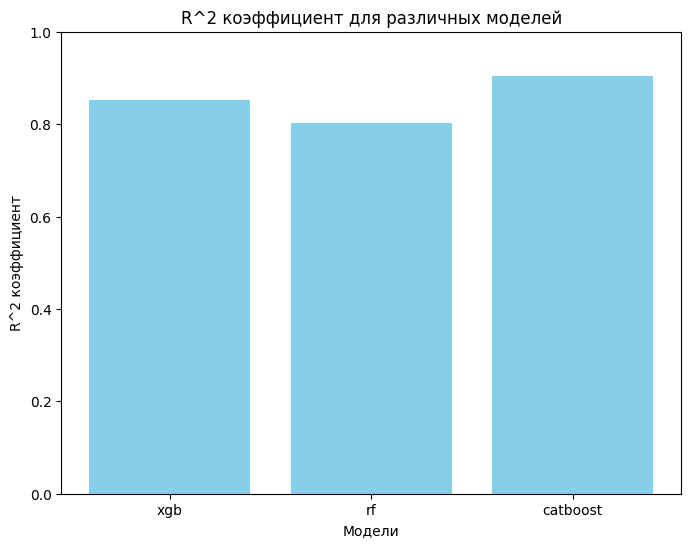

In [13]:
plt.figure(figsize=(8, 6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.xlabel('Модели')
plt.ylabel('R^2 коэффициент')
plt.title('R^2 коэффициент для различных моделей')
plt.ylim(0, 1)
plt.show()

Обучение CatBoostRegressor, для дальнейшнего сравнения с этой же моделью, но уже с подобраннами параметрами после использования GridSearch

In [17]:
model = CatBoostRegressor()

model.fit(X_train,
          y_train
          )
y_pred = model.predict(X_test)

r2_initial = r2_score(y_test,
                      y_pred)

Learning rate set to 0.062828
0:	learn: 0.1260454	total: 3.52ms	remaining: 3.52s
1:	learn: 0.1231950	total: 6.73ms	remaining: 3.36s
2:	learn: 0.1206350	total: 10.2ms	remaining: 3.4s
3:	learn: 0.1182574	total: 13.7ms	remaining: 3.41s
4:	learn: 0.1161550	total: 17.1ms	remaining: 3.4s
5:	learn: 0.1141595	total: 20.3ms	remaining: 3.37s
6:	learn: 0.1121382	total: 23.8ms	remaining: 3.37s
7:	learn: 0.1101845	total: 26.8ms	remaining: 3.33s
8:	learn: 0.1084161	total: 30ms	remaining: 3.3s
9:	learn: 0.1070022	total: 33.5ms	remaining: 3.32s
10:	learn: 0.1054602	total: 37.2ms	remaining: 3.35s
11:	learn: 0.1041804	total: 40.9ms	remaining: 3.37s
12:	learn: 0.1028524	total: 44.7ms	remaining: 3.39s
13:	learn: 0.1015567	total: 49.8ms	remaining: 3.51s
14:	learn: 0.1003807	total: 53.8ms	remaining: 3.54s
15:	learn: 0.0994200	total: 57.4ms	remaining: 3.53s
16:	learn: 0.0983111	total: 60.8ms	remaining: 3.51s
17:	learn: 0.0974483	total: 64.3ms	remaining: 3.51s
18:	learn: 0.0966338	total: 68.2ms	remaining: 3.5

Использование GridSearch для подбора наилучших параметров

In [31]:
param_grid = {'l2_leaf_reg':[4],
              'learning_rate':[0.1],
              'depth':[8],
              'iterations':[2000]
}
model = CatBoostRegressor()

grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    cv=3,
                    scoring='neg_root_mean_squared_error',
                    verbose=0
                    ) # 3-fold cross-validation is used for faster estimation of parameters combinations

grid.fit(X_train,
         y_train
         )
grid.best_params_

0:	learn: 0.1237478	total: 11.8ms	remaining: 23.6s
1:	learn: 0.1194784	total: 20.4ms	remaining: 20.4s
2:	learn: 0.1152228	total: 27.9ms	remaining: 18.5s
3:	learn: 0.1118423	total: 35.7ms	remaining: 17.8s
4:	learn: 0.1087572	total: 42.8ms	remaining: 17.1s
5:	learn: 0.1058726	total: 50ms	remaining: 16.6s
6:	learn: 0.1031991	total: 57.4ms	remaining: 16.4s
7:	learn: 0.1006988	total: 65.7ms	remaining: 16.4s
8:	learn: 0.0983856	total: 74.3ms	remaining: 16.4s
9:	learn: 0.0963061	total: 81.4ms	remaining: 16.2s
10:	learn: 0.0944520	total: 88.6ms	remaining: 16s
11:	learn: 0.0924726	total: 96.2ms	remaining: 15.9s
12:	learn: 0.0907667	total: 104ms	remaining: 15.9s
13:	learn: 0.0892042	total: 112ms	remaining: 15.8s
14:	learn: 0.0875336	total: 120ms	remaining: 15.8s
15:	learn: 0.0861540	total: 126ms	remaining: 15.6s
16:	learn: 0.0850298	total: 133ms	remaining: 15.5s
17:	learn: 0.0838505	total: 140ms	remaining: 15.5s
18:	learn: 0.0826235	total: 147ms	remaining: 15.3s
19:	learn: 0.0815674	total: 154ms

{'depth': 8, 'iterations': 2000, 'l2_leaf_reg': 4, 'learning_rate': 0.1}

Сохранение лучших гиперпарметров для дальнейшего использования при построении сравнительных графиков

In [32]:
optimized_model = grid.best_estimator_ # We take the best hyperparameters set for later use
y_pred_optimized = optimized_model.predict(X_test)
r2_optimized = r2_score(y_test,
                        y_pred_optimized
                        )

Графики для визуального сравнения модели на стандартных гиперпараметрах и после использования GridSearch с лучшими параметрами

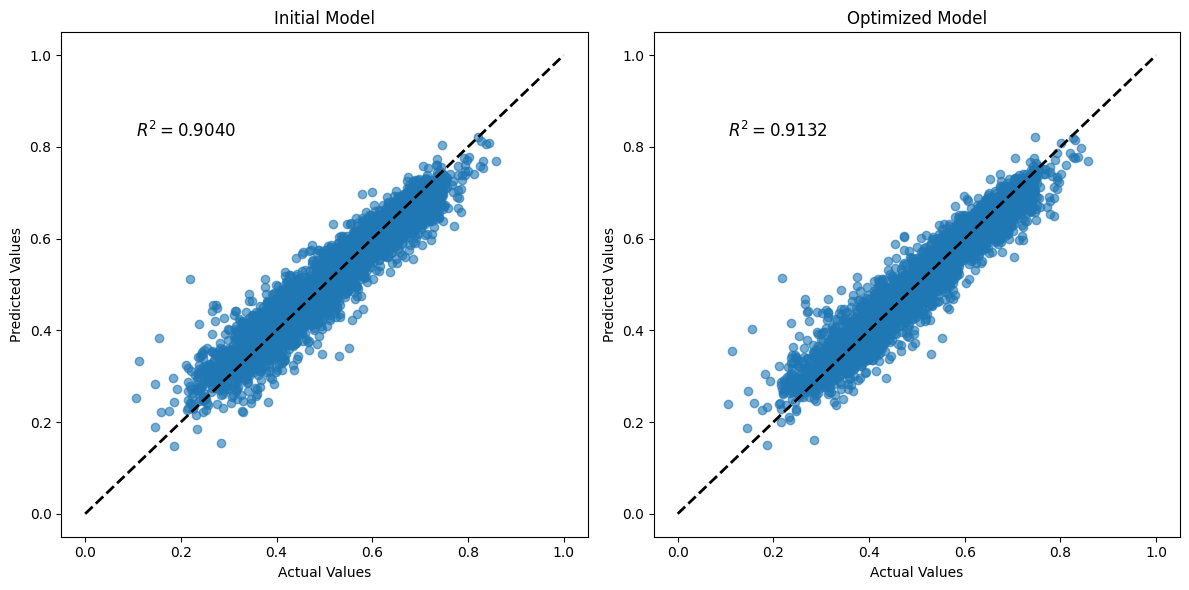

In [33]:
plt.figure(figsize=(12, 6))

# Here is the vizualization of the initial model performance
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Initial Model')
plt.text(np.min(y_test), np.max(y_pred), f'$R^2={r2_initial:.4f}$', fontsize=12)

# Vizualization of the optimized model performance
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_optimized, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Optimized Model')
plt.text(np.min(y_test), np.max(y_pred_optimized), f'$R^2={r2_optimized:.4f}$', fontsize=12)

plt.tight_layout()
plt.show()